##  What are the most demanded skills for Top 3 Data roles in India? 

##### Methodolgy 

1. Clean up skill column
2. Calculate skill count based on Job_title_short
3. Calculate skill percentage
4. Plot final results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else [])
                    )

In [26]:
import seaborn as sns

In [2]:
df_ind = df[df['job_country']=='India']


In [16]:
df_job_title_count = df_ind['job_title_short'].value_counts().reset_index(name= 'jobs_total')


In [6]:
df_skills = df_ind.explode('job_skills')
df_skills_count = df_skills.groupby([ 'job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
34,angular.js,Data Scientist,1
49,arch,Business Analyst,1
787,mlpack,Data Engineer,1
1679,yarn,Senior Data Scientist,1


In [21]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total'])*100
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,angular.js,Data Scientist,1,13279,0.007531
1685,arch,Business Analyst,1,1887,0.052994
1686,mlpack,Data Engineer,1,19062,0.005246
1687,yarn,Senior Data Scientist,1,2486,0.040225


In [9]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

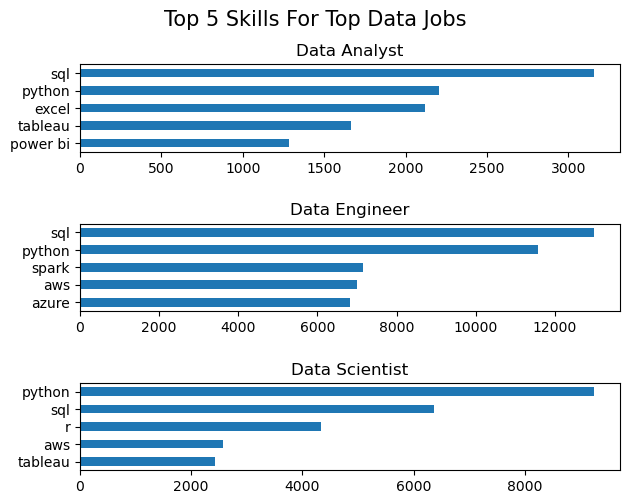

In [12]:
fig, ax = plt.subplots(len(job_titles),1)

for i , job in enumerate(job_titles):
    df_filtered = df_skills_count[df_skills_count['job_title_short']== job].head(5)
    df_filtered.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i],title=job, legend=False, ylabel='')
    ax[i].invert_yaxis()

fig.tight_layout(h_pad=2)
fig.suptitle('Top 5 Skills For Top Data Jobs', fontsize=15, y=1.04)
plt.show()

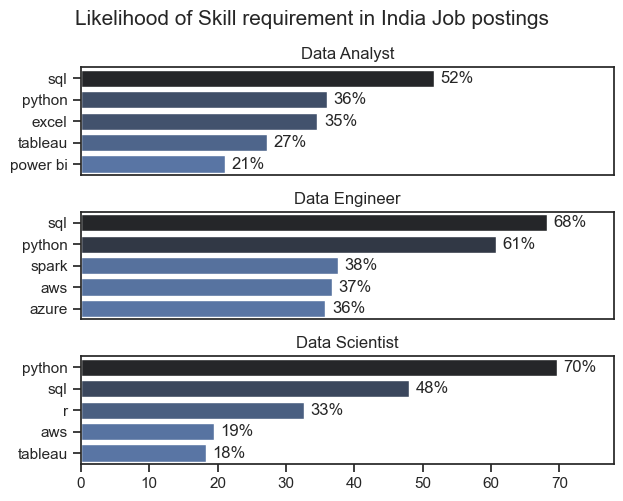

In [45]:
fig, ax = plt.subplots(len(job_titles),1)

sns.set_theme(style = 'ticks')
for i , job in enumerate(job_titles):
    df_filtered = df_skills_perc[df_skills_perc['job_title_short']== job].head(5)
    
    sns.barplot(
        data = df_filtered, x='percent', y='job_skills', ax=ax[i], legend=False, hue='skill_count',
        palette='dark:b_r')
    ax[i].set_ylabel('')
    ax[i].set_title(job)
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,78)

    for n, v in enumerate(df_filtered['percent']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center', fontsize=12)

    if i!=len(job_titles)-1:
        ax[i].set_xticks([])

fig.tight_layout(h_pad=1)

fig.suptitle('Likelihood of Skill requirement in India Job postings', fontsize=15, y=1.04)
plt.show()